<a href="https://colab.research.google.com/github/jalvarez2410/Estadistica-y-probabilidad/blob/main/Actividad_5_Jos%C3%A9_Alvarez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerías

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import chi2

#Problema 1
Muchos pacientes con problemas del corazon tienen un marcapasos para controlar su ritmo cardiaco. El marcapasos tiene montado un modulo conector de
plastico en la parte superior. Suponga una desviacion estandar de 0.0015 pulgadas y una distribucion aproximadamente normal, y con base en esto calcule
un intervalo de confianza del 95% para la media de la profundidad de todos los
modulos conectores fabricados por cierta empresa. Una muestra aleatoria de 75
modulos tiene una profundidad promedio de 0.310 pulgadas.


In [6]:

# Datos
media_muestral = 0.310
sigma = 0.0015
n = 75
alfa = 0.05

# Valor z crítico para 95% de confianza
z_critico = stats.norm.ppf(1 - alfa/2)

# Error estándar
error_estandar = sigma / np.sqrt(n)

# Intervalo de confianza
limite_inferior = media_muestral - z_critico * error_estandar
limite_superior = media_muestral + z_critico * error_estandar

# Resultado
print(f"Intervalo de confianza del 95% para la media: ({limite_inferior:.5f}, {limite_superior:.5f}) pulgadas")


Intervalo de confianza del 95% para la media: (0.30966, 0.31034) pulgadas


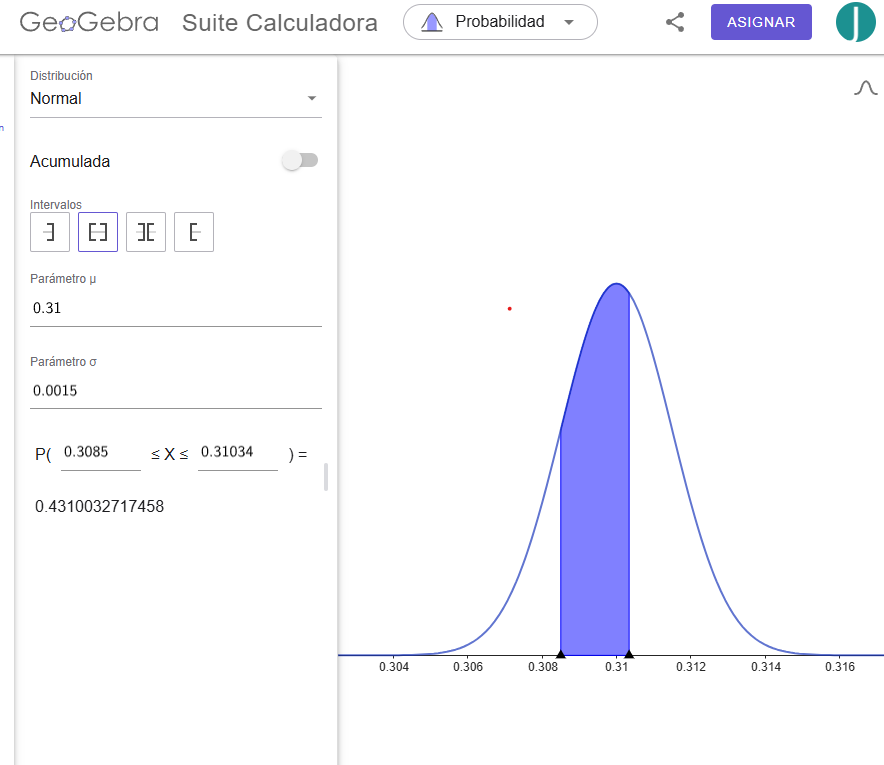

#Problema 2
    
Se registran las siguientes mediciones del tiempo de secado, en horas, de cierta
marca de pintura vin´ılica:
3.4 2.5 4.8 2.9 3.6
2.8 3.3 5.6 3.7 2.8
4.4 4.0 5.2 3.0 4.8
Suponga que las mediciones representan una muestra aleatoria de una poblaci´on
normal y con base en esto calcule el intervalo de predicci´on del 95% para el
tiempo de secado de la siguiente prueba de pintura.


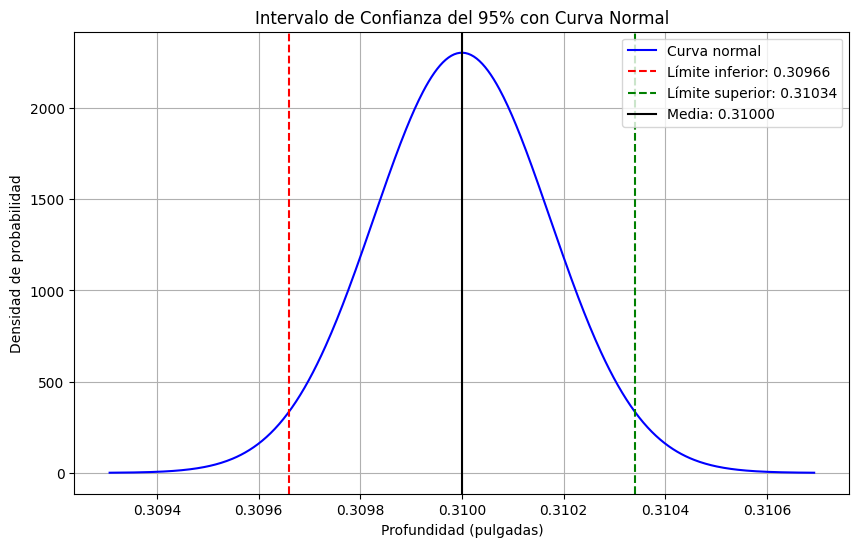

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros del problema
media = 0.310
sigma = 0.0015
n = 75
alfa = 0.05

# Cálculo del error estándar y límites del IC
error_estandar = sigma / np.sqrt(n)
z_critico = norm.ppf(1 - alfa/2)
limite_inferior = media - z_critico * error_estandar
limite_superior = media + z_critico * error_estandar

# Rango para la curva normal
x = np.linspace(media - 4*error_estandar, media + 4*error_estandar, 500)
y = norm.pdf(x, loc=media, scale=error_estandar)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Curva normal', color='blue')
plt.axvline(limite_inferior, color='red', linestyle='--', label=f'Límite inferior: {limite_inferior:.5f}')
plt.axvline(limite_superior, color='green', linestyle='--', label=f'Límite superior: {limite_superior:.5f}')
plt.axvline(media, color='black', linestyle='-', label=f'Media: {media:.5f}')
plt.title('Intervalo de Confianza del 95% con Curva Normal')
plt.xlabel('Profundidad (pulgadas)')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()


In [14]:

# Datos
tiempos = np.array([
    3.4, 2.5, 4.8, 2.9, 3.6,
    2.8, 3.3, 5.6, 3.7, 2.8,
    4.4, 4.0, 5.2, 3.0, 4.8
])

n = len(tiempos)
media = np.mean(tiempos)
s = np.std(tiempos, ddof=1)
alfa = 0.05
gl = n - 1

# t crítico
t_critico = t.ppf(1 - alfa/2, df=gl)

# Intervalo de predicción
margen_error = t_critico * s * np.sqrt(1 + 1/n)
limite_inferior = media - margen_error
limite_superior = media + margen_error

# Resultado
print(f"El promedio es de: {media:.2f}")
print(f"Intervalo de predicción del 95% para una nueva medición: ({limite_inferior:.2f}, {limite_superior:.2f}) horas")


El promedio es de: 3.79
Intervalo de predicción del 95% para una nueva medición: (1.64, 5.94) horas


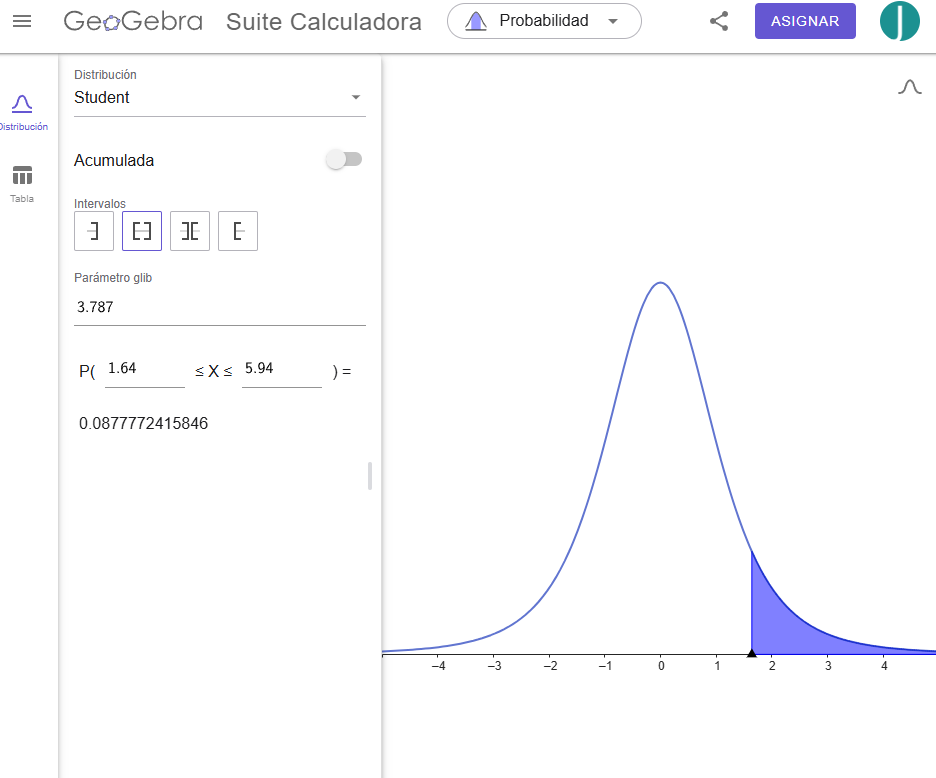

#Problema 3
1. Se selecciona una muestra aleatoria de 200 votantes en una ciudad y se
encuentra que 114 apoyan un juicio de anexi´on. Calcule el intervalo de
confianza del 96% para la parte de la poblaci´on votante que est´a a favor
del juicio.

2. ¿Qu´e podemos afirmar con 96% de confianza acerca de la posible magnitud
de nuestro error, si estimamos que la fracci´on de votantes que est´a a favor
del juicio de anexi´on es 0.57 ?


In [19]:
#Parte 1
# Datos
n = 200
x = 114
p_hat = x / n
alfa = 0.04
z_critico = norm.ppf(1 - alfa/2)

# Error estándar
error_estandar = np.sqrt(p_hat * (1 - p_hat) / n)

# Intervalo de confianza
limite_inferior = p_hat - z_critico * error_estandar
limite_superior = p_hat + z_critico * error_estandar

# Resultado
print(f"La proporción es de: {p_hat}, El de la deviación estándar es de: {error_estandar:.3f}")
print(f"Intervalo de confianza del 96% para la proporción: ({limite_inferior:.4f}, {limite_superior:.4f})")


La proporción es de: 0.57, El de la deviación estándar es de: 0.035
Intervalo de confianza del 96% para la proporción: (0.4981, 0.6419)


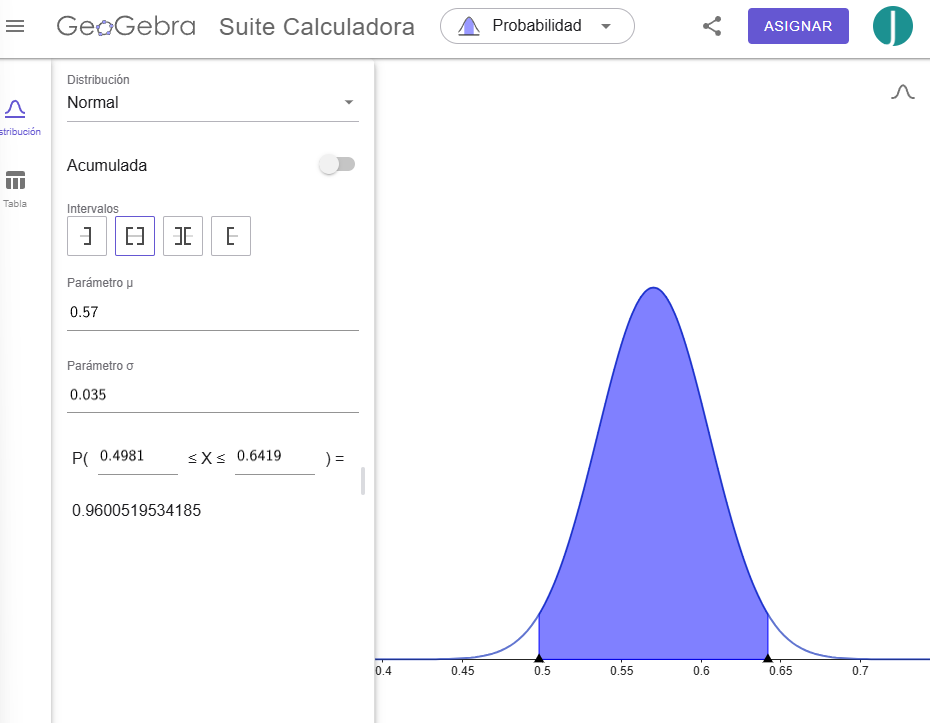

Parte 2:
Con 96% de confianza, el verdadero valor de la proporción poblacional está a no más de 0.035 de variabilidad de la proporción de 0.57. Realizando el coeficiende de variabilidad este se encuentra por debajo de 0.33 por lo que se puede indicar que la variabilidad en los datos es poca.

#Problema 4
Un fabricante de bater´ıas para autom´ovil afirma que sus bater´ıas durar´an, en
promedio, 3 a˜nos con una varianza de 1 a˜no. Suponga que 5 de estas bater´ıas
tienen duraciones de 1.9, 2.4, 3.0, 3.5 y 4.2 a˜nos y con base en esto construya
un intervalo de confianza del 95% para σ
2
, despu´es decida si la afirmaci´on del
fabricante de que σ
2 = 1 es v´alida. Suponga que la poblaci´on de duraciones de
las bater´ıas se distribuye de forma aproximadamente normal.

In [24]:

# Datos
datos = np.array([1.9, 2.4, 3.0, 3.5, 4.2])
n = len(datos)
gl = n - 1
alfa = 0.05

# Varianza muestral
s2 = np.var(datos, ddof=1)

# Valores críticos de chi-cuadrado
chi2_inf = chi2.ppf(alfa / 2, df=gl)
chi2_sup = chi2.ppf(1 - alfa / 2, df=gl)

# Intervalo de confianza para la varianza
li_var = (gl * s2) / chi2_sup
ls_var = (gl * s2) / chi2_inf

# Resultado
print(f"Intervalo de confianza del 95% para la varianza: ({li_var:.4f}, {ls_var:.4f}.)", "\nExiste suficiente evidencia para indicar que la afirmación del fabricante es válida.")


Intervalo de confianza del 95% para la varianza: (0.2926, 6.7297.) 
Existe suficiente evidencia para indicar que la afirmación del fabricante es válida.


#Problema 5
Una muestra aleatoria de 20 estudiantes obtuvo una media de ¯x = 72 y una
varianza de s
2 = 16 en un examen universitario de colocaci´on en matem´aticas.
Suponga que las calificaciones se distribuyen normalmente y con base en esto
construya un intervalo de confianza del 98% para σ
2

In [25]:

# Datos
n = 20
s2 = 16
gl = n - 1
alfa = 0.02

# Valores críticos de chi-cuadrado
chi2_inf = chi2.ppf(alfa / 2, df=gl)
chi2_sup = chi2.ppf(1 - alfa / 2, df=gl)

# Cálculo del intervalo de confianza
limite_inferior = (gl * s2) / chi2_sup
limite_superior = (gl * s2) / chi2_inf

# Resultado
print(f"Intervalo de confianza del 98% para la varianza: ({limite_inferior:.4f}, {limite_superior:.4f})")


Intervalo de confianza del 98% para la varianza: (8.3999, 39.8285)
